# Pandas et Dataviz

In [1]:
%who

Interactive namespace is empty.


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
#optimisation des affichages sur notebook
%matplotlib inline

Etude des données sur les logements en Californie

In [5]:
frame_house=pd.read_csv("housing.csv")

In [6]:
frame_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
frame_house.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [12]:
frame_house.agg(["mean","median","std"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.213039
median,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.203162
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.057983


In [11]:
#créer une variable
frame_house["total"]=frame_house["total_bedrooms"]/frame_house["total_rooms"]

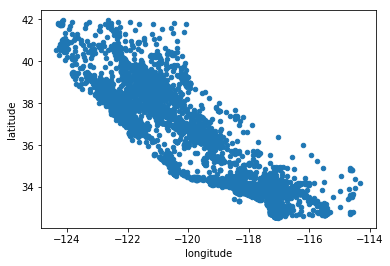

In [13]:
#on représente les données
frame_house.plot("longitude","latitude",kind="scatter")

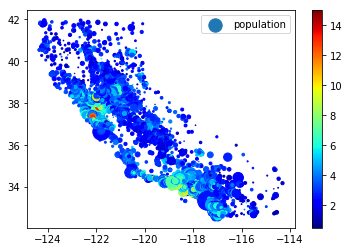

In [24]:
#on affiche les données de position GPS avec la taille des communes et l'age médian des logements
plt.scatter("longitude","latitude",data=frame_house,s=frame_house["population"]/100,
            c="median_income",alpha=0.3,
            label="population",cmap=plt.get_cmap("jet"))

plt.colorbar()
plt.legend()

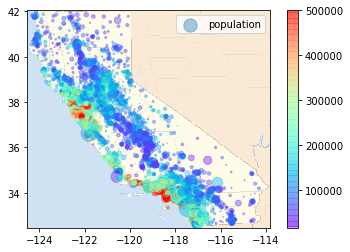

In [8]:
import matplotlib.image as mpimg
calif_image=mpimg.imread("California.png")

plt.scatter("longitude","latitude",s=frame_house["population"]/100,
            c="median_income",alpha=0.4,data=frame_house,label="population",cmap=plt.get_cmap("rainbow"))
plt.colorbar()
plt.imshow(calif_image, alpha=0.5, extent=[-124.55, -113.80, 32.45, 42.05])
plt.legend()

In [25]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


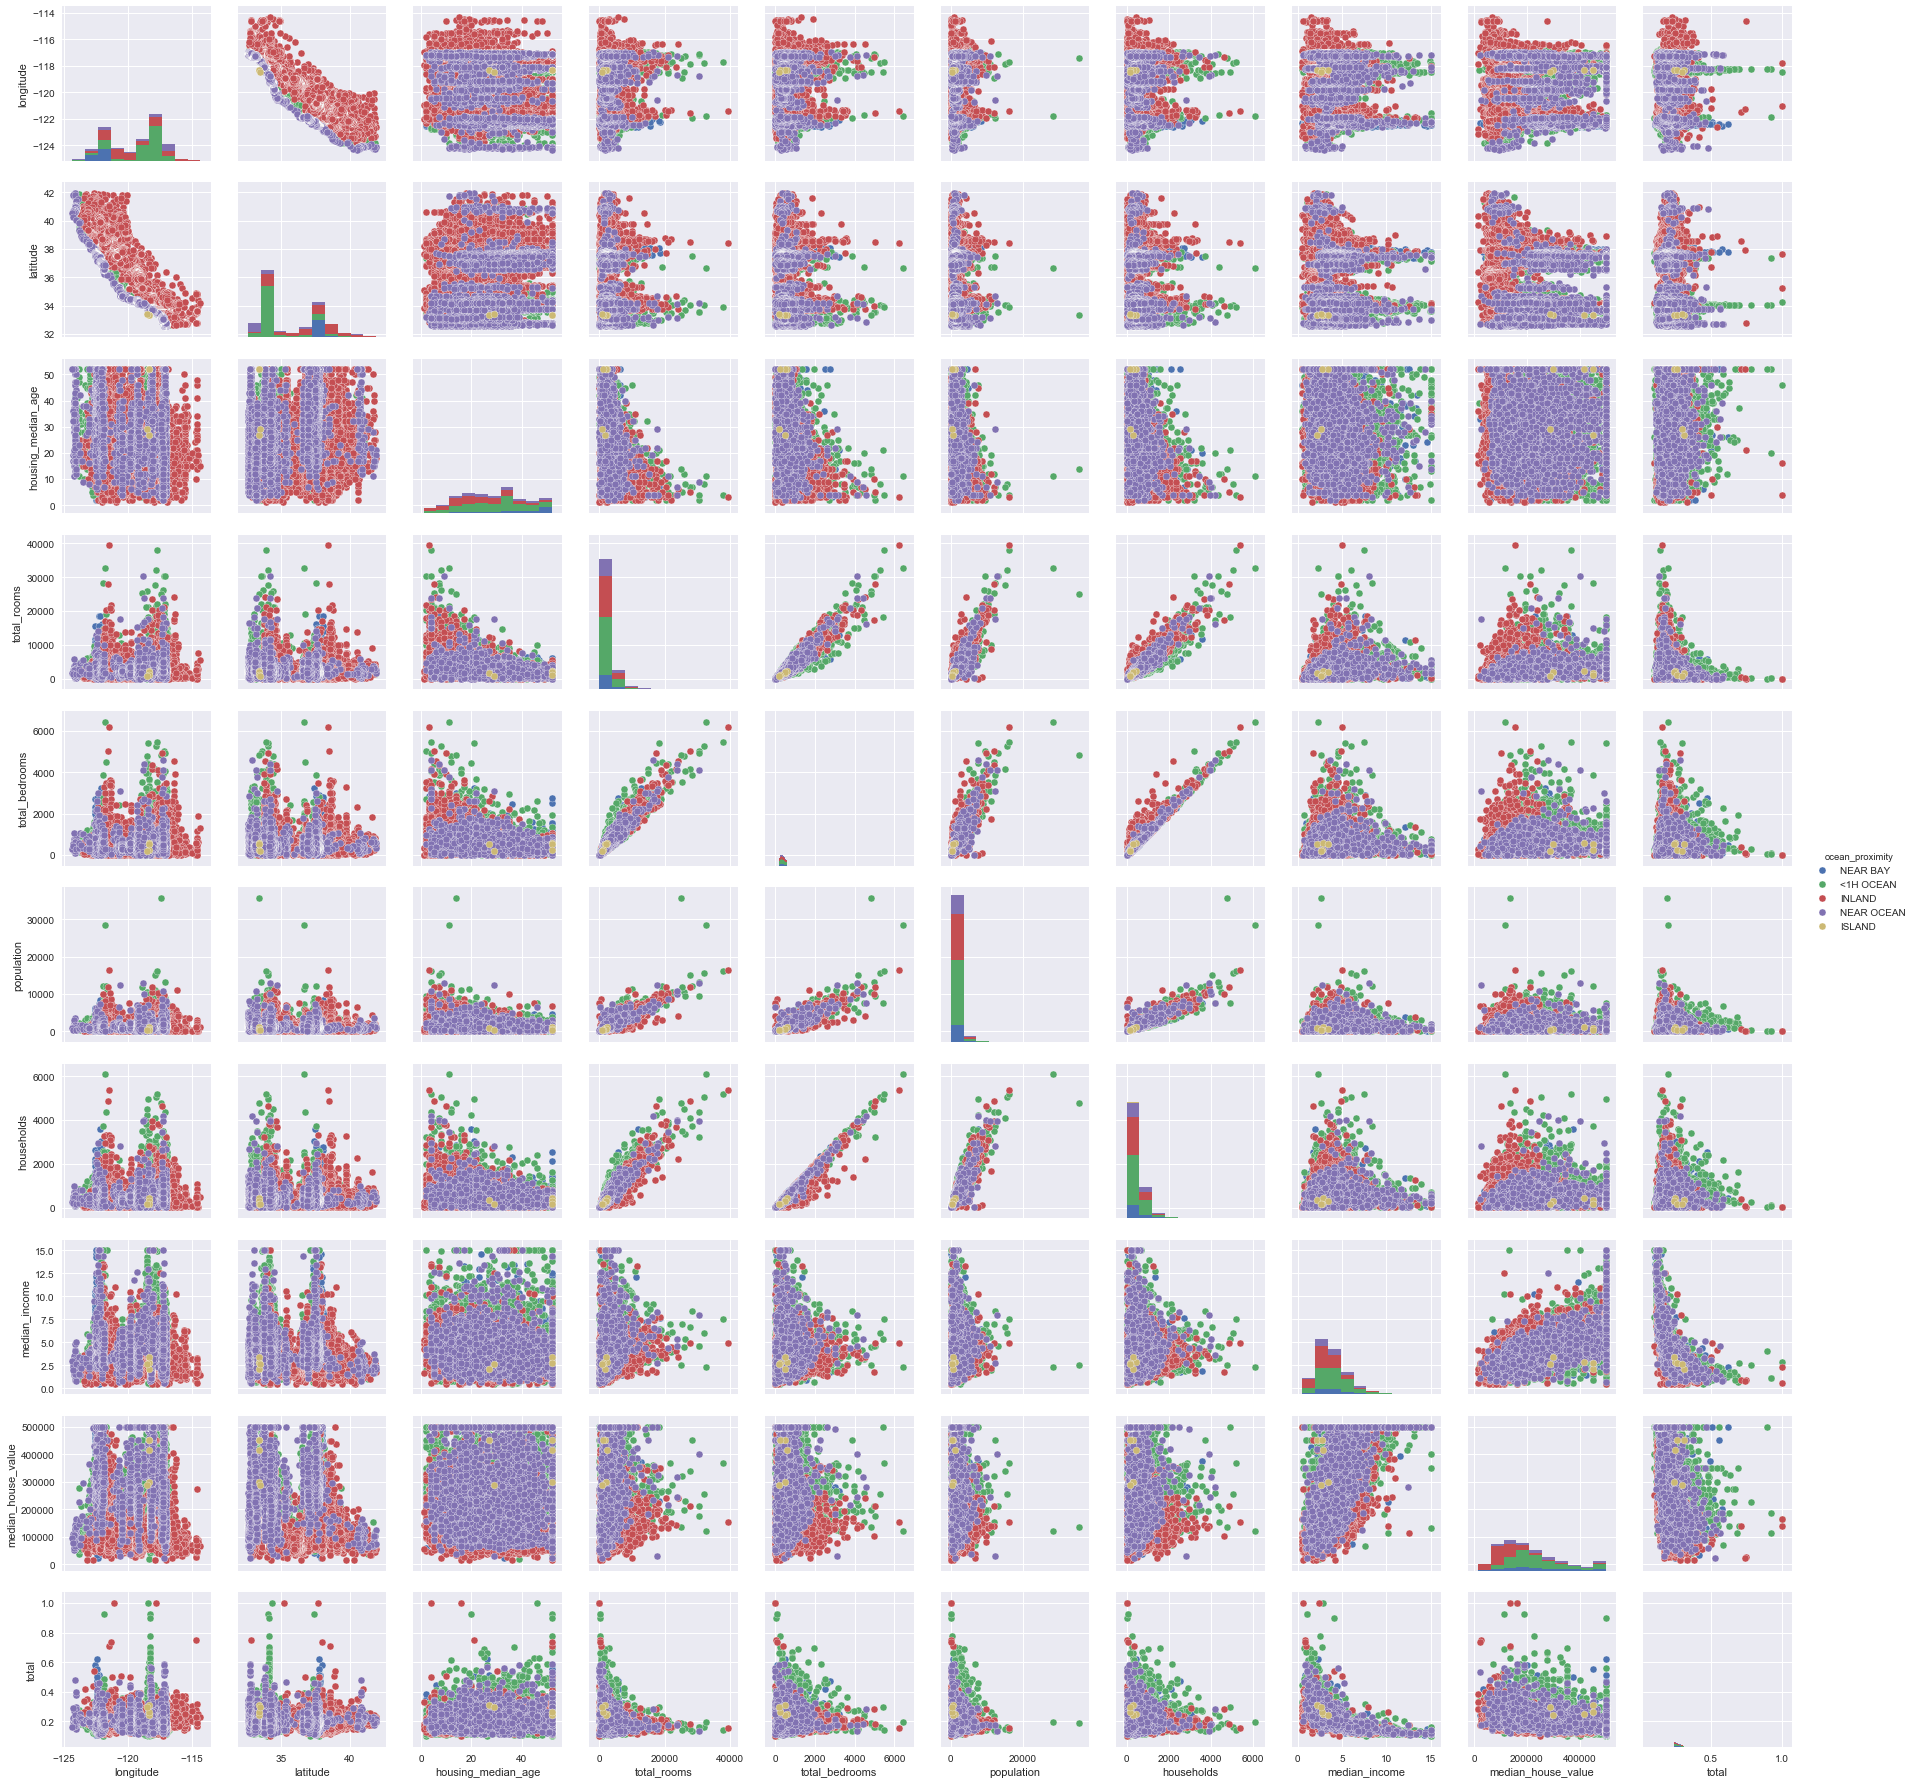

In [28]:
sns.pairplot(frame_house,hue="ocean_proximity")